In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_feet_sim
%store -r Y_feet_sim
print(X_feet_sim.shape)
print(Y_feet_sim.shape)

(14790, 20)
(14790, 4)


In [6]:
min(Y_feet_sim[:, 0])

-0.12355339407301584

In [7]:
max(Y_feet_sim[:, 0])

0.665582706973134

# Multivariate Linear Regression (Foot prediction)

In [8]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [9]:
X_feet_sim[0]

array([ 1.00000000e-01,  0.00000000e+00,  0.00000000e+00, -7.23774556e-04,
        1.63913405e-02, -4.25253900e-03,  2.52678370e-01,  1.34278938e-01,
       -2.77884607e-01,  2.48699126e-01, -1.23663102e-01, -3.13305709e-01,
       -2.69007467e-01,  1.27140112e-01, -3.13660563e-01, -2.69880417e-01,
       -1.35002353e-01, -2.81540030e-01,  0.00000000e+00,  1.00000000e+00])

In [10]:
Y_feet_sim[0]

array([ 0.03600915, -0.00539881,  0.03108886,  0.01310269])

## Predict FL foot -> x

### Linear Regression

In [11]:
def find_best_model(X, Y, runs=1000):
    best_model = None
    lowest_error = 100
    best_Xtr, best_Xte, best_Ytr, best_Yte = None, None, None, None
    
    for _ in range(runs):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, shuffle=True)
        
        model = LinearRegression()
        model.fit(X_train, Y_train)

        predictions = model.predict(X_test)
        error = np.max(np.abs(predictions - Y_test))

        if error < lowest_error:
            best_model = model
            lowest_error = error
            best_Xtr, best_Xte, best_Ytr, best_Yte = X_train, X_test, Y_train, Y_test

    # Stats
    predictions = best_model.predict(best_Xte)
    print('R2: ', r2_score(predictions, best_Yte))
    print('RMSE: ', np.sqrt(mean_squared_error(best_Yte, predictions)))
    print("The lowest error is: ", np.min(np.abs(predictions - best_Yte)))
    print("The highest error is: ", np.max(np.abs(predictions - best_Yte)))
    print("The avg. error is: ", np.mean(np.abs(predictions - best_Yte)))
    
    return best_Xte, best_Yte, predictions, best_model

In [12]:
# Input
X = np.hstack((X_feet_sim[:, 0:1], # current reference velocity
               X_feet_sim[:, 3:4], # actual velocity
               X_feet_sim[:, 6:8], # FL position
               X_feet_sim[:, 9:11], # FR position
               X_feet_sim[:, 12:14], # RL position
               X_feet_sim[:, 15:17])) # RR position

# Labels
Y = np.array([Y_feet_sim[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split dataset and fit best model
X_test, Y_test, predictions, model_fl_relative_support_x = find_best_model(X, Y, runs=5000)

R2:  0.9880329210876992
RMSE:  0.0181552432899536
The lowest error is:  1.7198220178094026e-05
The highest error is:  0.05929053306269394
The avg. error is:  0.01381456248408177


In [13]:
model_fl_relative_support_x.coef_

array([[ 0.29964666,  0.31752395, -0.63171749,  0.25078884, -0.5806638 ,
        -0.23353872, -0.01500927,  0.62897377,  0.03867802, -0.64303468]])

In [14]:
model_fl_relative_support_x.intercept_

array([0.08248208])

In [15]:
#inp = np.array([[0.9, 0.661, 0.159, 0.124, 0.331, -0.137, -0.169, 0.119, -0.337, -0.127]])

In [16]:
#out = model_fl_relative_support_x.coef_ @ inp.T
#out += model_fl_relative_support_x.intercept_
#print(out)

Text(0, 0.5, 'Predictions')

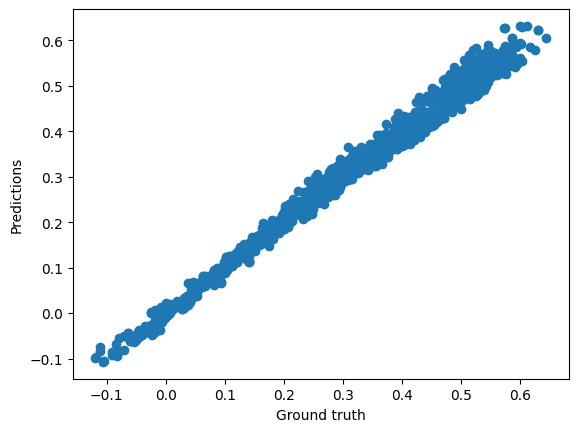

In [17]:
# The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [18]:
#for idx, prediction in enumerate(predictions):
#    print(f'{X_test[idx, 0]} -> {X_test[idx, 3]}. CoM: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}.')

### Predict FL foot -> y

In [19]:
# Input
X = np.hstack((X_feet_sim[:, 0:1], # current reference velocity
               X_feet_sim[:, 3:4], # actual velocity
               X_feet_sim[:, 6:8], # FL position
               X_feet_sim[:, 9:11], # FR position
               X_feet_sim[:, 12:14], # RL position
               X_feet_sim[:, 15:17])) # RR position

# Labels
Y = np.array([Y_feet_sim[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split dataset and fit best model
X_test, Y_test, predictions, model_fl_relative_support_y = find_best_model(X, Y, runs=5000)

R2:  -236.20038239809466
RMSE:  0.020283219461748877
The lowest error is:  0.0001220986749289471
The highest error is:  0.06681979146952062
The avg. error is:  0.016708168046843944


In [20]:
model_fl_relative_support_y.coef_

array([[-6.68847940e-05,  4.05595280e-03,  3.77927166e-02,
         1.16062116e-02,  4.82208001e-03, -2.44262538e-02,
        -3.31418929e-02,  2.42256065e-02, -6.68354721e-02,
        -1.64414447e-02]])

In [21]:
model_fl_relative_support_y.intercept_

array([-0.04552546])

Text(0, 0.5, 'Predictions')

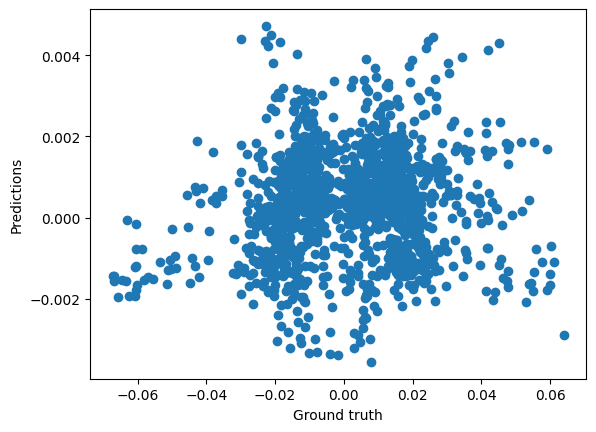

In [22]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [25]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')